#**Problem Statement**


Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered


CTR depends on multiple factors like design, content, personalization, etc. 

Variable - Description

campaign_id - Unique identifier of a campaign

sender - Sender of an e-mail

subject_len - No. of characters in a subject

body_len - No. of characters in an email body

mean_paragraph_len - Average no. of characters in paragraph of an email

day_of_week - Day on which email is sent

is_weekend - Boolean flag indicating if an email is sent on weekend or not

times_of_day - Times of day when email is sent: Morning, Noon, Evening

category - Category of the product an email is related to

product - Type of the product an email is related to

no_of_CTA - No. of Call To Actions in an email

mean_CTA_len - Average no. of characters in a CTA 

is_image - No. of images in an email

is_personalised - Boolean flag indicating if an email is personalized to the user or not

is_quote - No. of quotes in an email

is_timer - Boolean flag indicating if an email contains a timer or not

is_emoticons - No. of emoticons in an email

is_discount - Boolean flag indicating if an email contains a discount or not

is_price - Boolean flag indicating if an email contains price or not

is_urgency - Boolean flag indicating if an email contains urgency or not

target_audience - Cluster label of the target audience

click_rate (Target Variable) - Click rate of an email campaign

In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


#Importing Dictionaries:

In [2]:
#Import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Data Warehousing**

In [3]:
df_train = '/content/train_F3fUq2S.csv'
df_test = '/content/test_Bk2wfZ3.csv'

In [4]:
#Reading the dataset
train = pd.read_csv(df_train)
test = pd.read_csv(df_test)

In [5]:
#The first glimpse of the dataset.
train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


In [6]:
test

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,Evening,15,9,...,28,0,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,Evening,2,11,...,27,0,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,Evening,15,9,...,23,0,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,Noon,2,11,...,22,0,0,1,0,0,0,0,0,10


As we can see our data have **1888 instances** and **22 features**.

In [7]:
campaign_id, click_rate = 'campaign_id' , 'click_rate'

#**Data Inspection**

In [8]:
#Checking the Null Values
train.isnull().sum()/train.shape[0]

campaign_id           0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
target_audience       0.0
click_rate            0.0
dtype: float64

In [9]:
#Checking the duplicates.
len(train[train.duplicated()])

0

* **Why do you need to fill in the missing data?** Because most of the machine learning models that you want to use will provide an error if you pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.

* **Fortunately, as seen above, we do not have any Null/Missing values or duplicate values.**

In [10]:
#Checking the number of unique values in columns.
train.nunique(axis=0)

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [11]:
#Dropping the column.
train= train.drop(['is_timer'],axis =1)
test= test.drop(['is_timer'],axis =1)

By checking unique values of each column, we can see that column 'is_timer' has 0 values only. Therefore, we decided to drop this column.

In [12]:
#Checking the value_counts of each unique values of some categorical columns.
for var in train.columns:
  if var in ['is_emoticons','is_price','is_quote','is_image','day_of_week']:
    print(f'\033[1m\033[4mThe column {var} has unique values\033[0m:\n{train[var].value_counts()}')

The column day_of_week has unique values:
3    346
2    333
4    329
1    295
5    237
0    208
6    140
Name: day_of_week, dtype: int64
The column is_image has unique values:
0    716
1    685
2    442
3     39
6      4
4      2
Name: is_image, dtype: int64
The column is_quote has unique values:
0    885
1    638
2    227
3     93
4     27
5     12
6      6
Name: is_quote, dtype: int64
The column is_emoticons has unique values:
0    1626
1     172
2      54
3      30
4       4
6       2
Name: is_emoticons, dtype: int64
The column is_price has unique values:
0        1875
5499        5
8000        2
5000        2
4999        1
1399        1
1000        1
14999       1
Name: is_price, dtype: int64


In [13]:
#Detailed information of columns.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_emoticons        1888 non-null   int64  
 16  is_dis

We can see that, the dataset has only 1 categorical column and 20 numerical columns.

##**Descriptive Statistics**

In [14]:
train.describe([0.90]).T

,count,mean,std,min,50%,90%,max
campaign_id,1888.0,944.500000,545.162973,1.0,944.500000,1699.300000,1888.000000
sender,1888.0,4.395657,3.277927,0.0,3.000000,10.000000,15.000000
subject_len,1888.0,86.246292,30.143206,9.0,83.000000,115.000000,265.000000
body_len,1888.0,14185.780191,7327.615307,23.0,12689.000000,23951.000000,44491.000000
mean_paragraph_len,1888.0,35.239407,28.139498,4.0,29.000000,57.000000,286.000000
day_of_week,1888.0,2.828390,1.763193,0.0,3.000000,5.000000,6.000000
is_weekend,1888.0,0.199682,0.399867,0.0,0.000000,1.000000,1.000000
category,1888.0,9.949682,5.300719,0.0,10.000000,15.000000,15.000000
product,1888.0,17.525424,12.369526,0.0,12.000000,34.000000,43.000000
no_of_CTA,1888.0,4.222458,4.628348,0.0,3.000000,8.000000,49.000000


#**EDA**

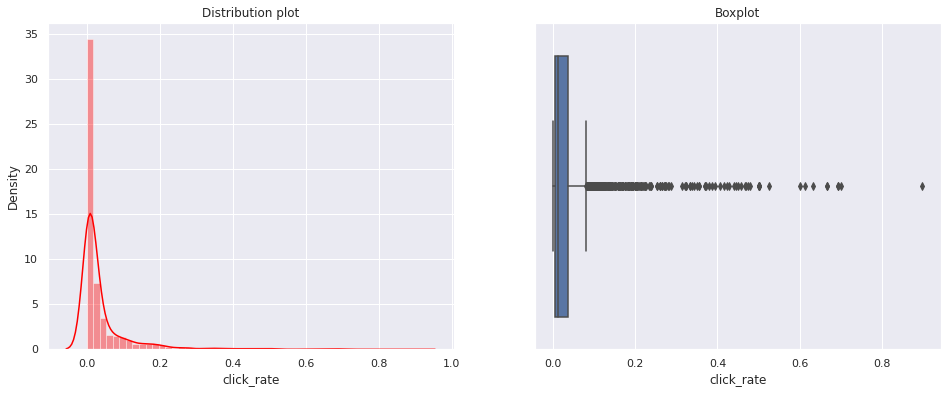

In [15]:
#Let us look at dependent variable 'click_rate'
#Distplot & boxplot.
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(train['click_rate'], color='red')
plt.title('Distribution plot')
#Boxplot
subplot(1,2,2)
sns.boxplot(train['click_rate'])
plt.title('Boxplot');

We can observe that, the dependent variable is highly right skewed. Click_rate variable has ample amount of outliers as well.

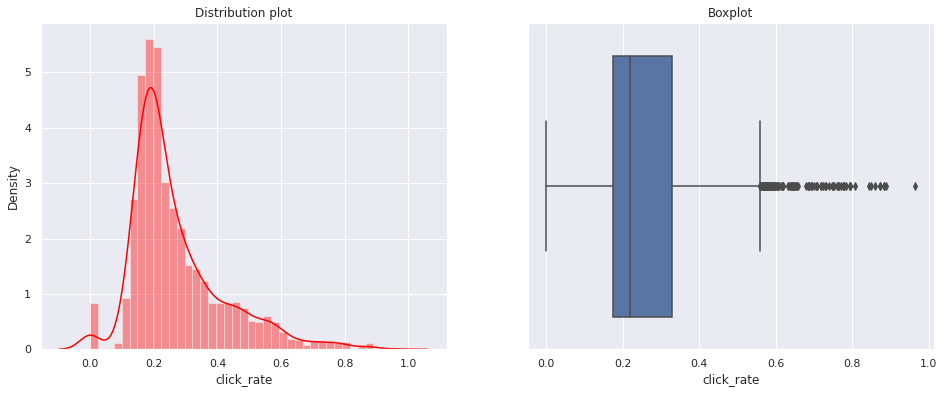

In [16]:
#Balancing the skewness using log transformation
# Cube root is used instead of log10 to make it look like normal distribution.
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(np.cbrt(train['click_rate']), color='red')
plt.title('Distribution plot')
#Boxplot
subplot(1,2,2)
sns.boxplot(np.cbrt(train['click_rate']))
plt.title('Boxplot');

Our dependent variable looks nearly normal distributed after applying cube root transformation.

In [20]:
#Assigning the train numerical features.
Numerical_features = train.select_dtypes(include= ['int64','float'])
Numerical_features.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'category',
       'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised',
       'is_quote', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate'],
      dtype='object')

In [21]:
#Assigning the test numerical features.
Numerical_features1 = test.select_dtypes(include= ['int64','float'])
Numerical_features1.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'category',
       'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised',
       'is_quote', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience'],
      dtype='object')

In [22]:
#Assigning the train categorical features.
Categorical_features = train.select_dtypes(include=['object'])
Categorical_features.columns

Index(['times_of_day'], dtype='object')

In [23]:
#Assigning the test categorical features.
Categorical_features1 = test.select_dtypes(include=['object'])
Categorical_features1.columns

Index(['times_of_day'], dtype='object')

#Univariate Analysis

In [24]:
#We define a function to implement Univariate Analysis.
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

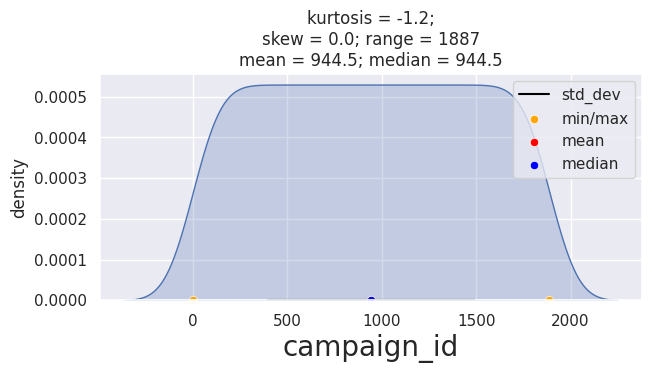

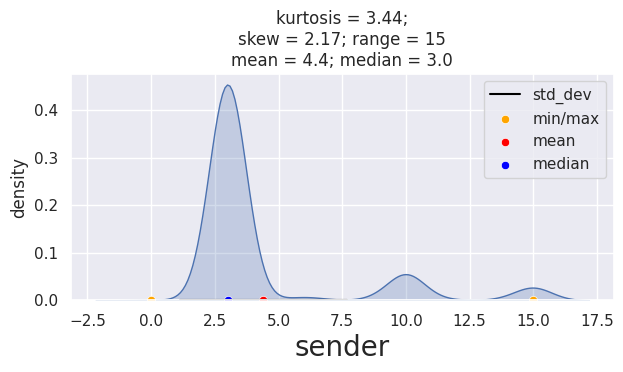

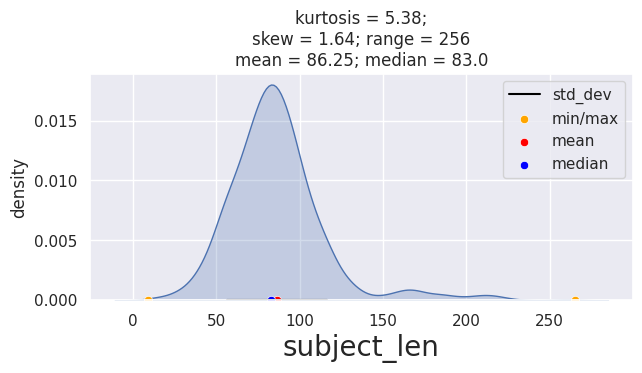

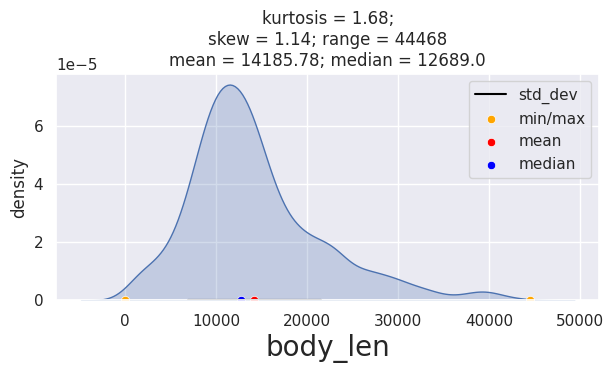

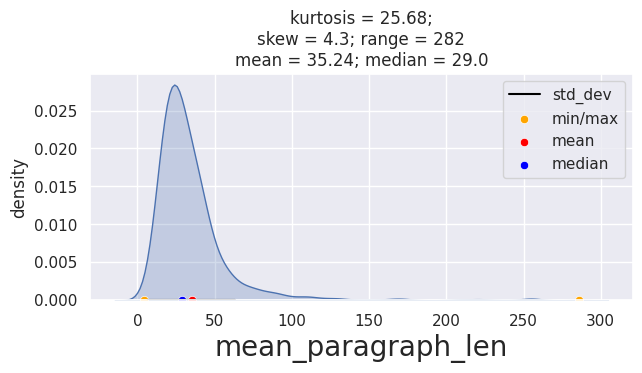

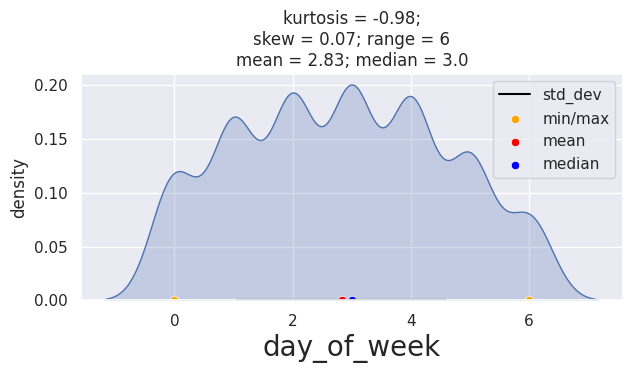

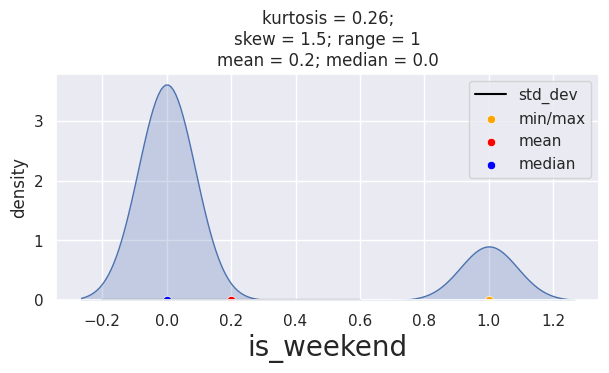

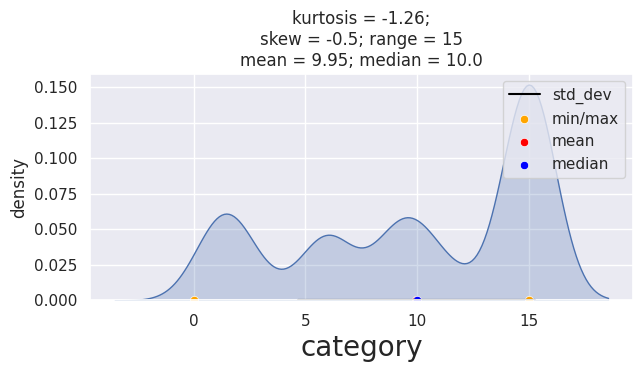

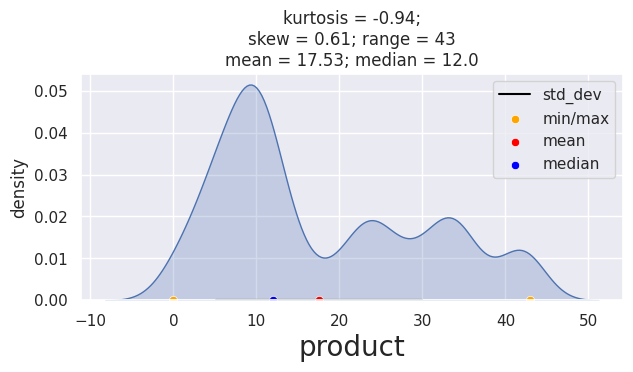

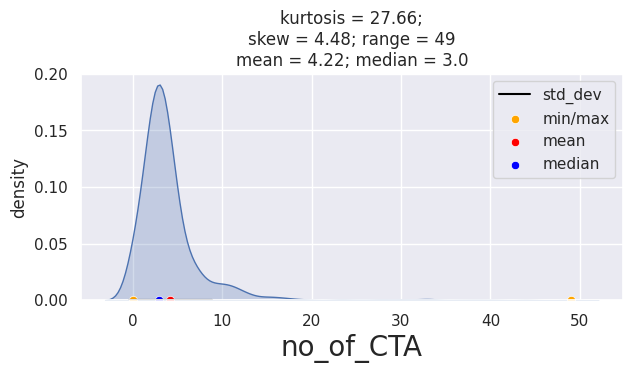

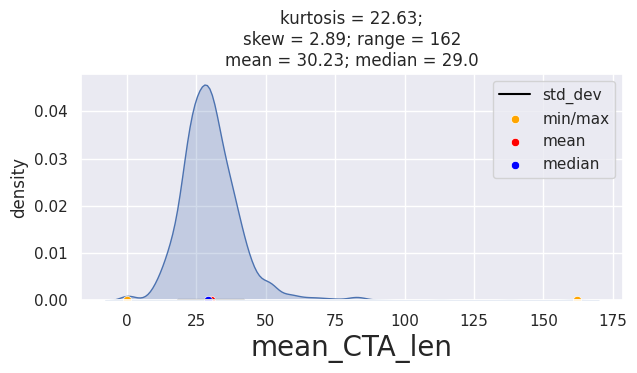

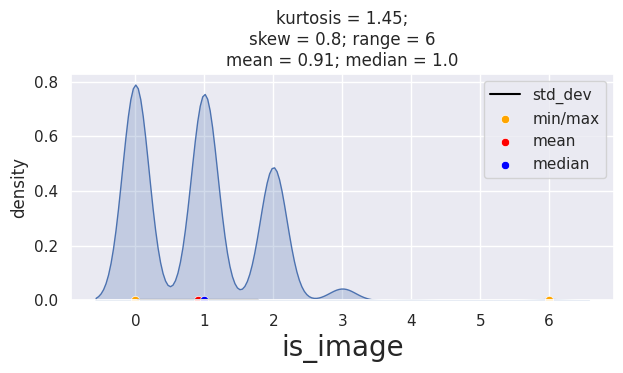

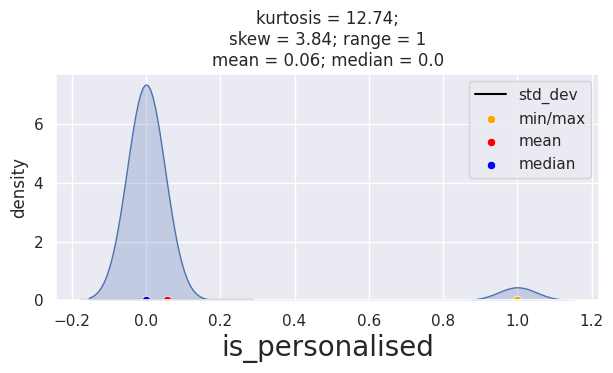

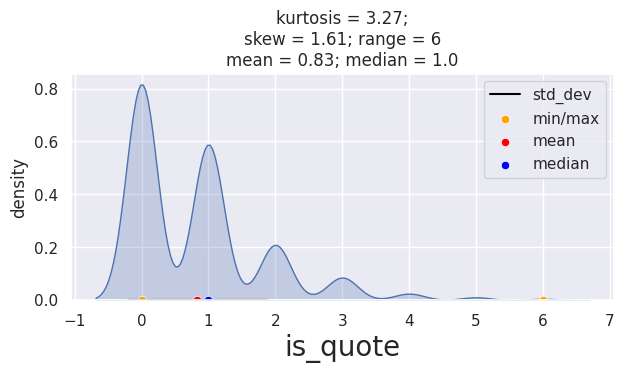

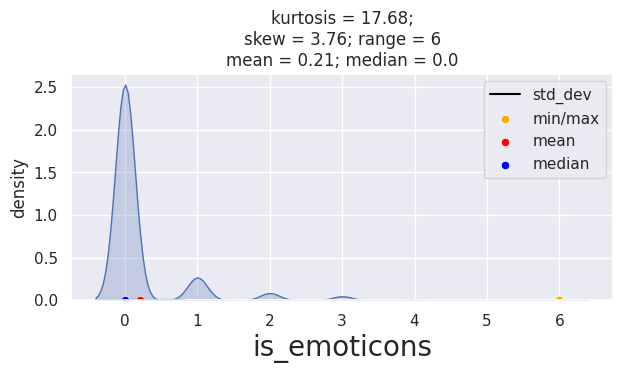

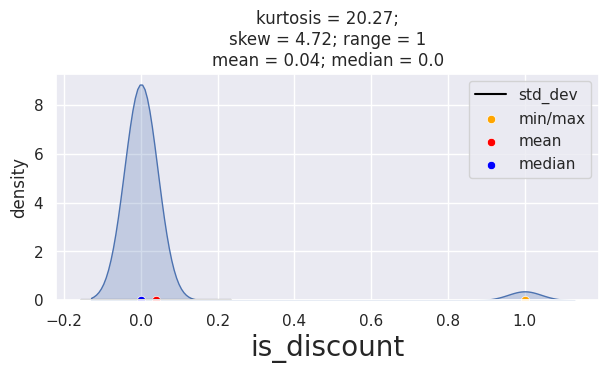

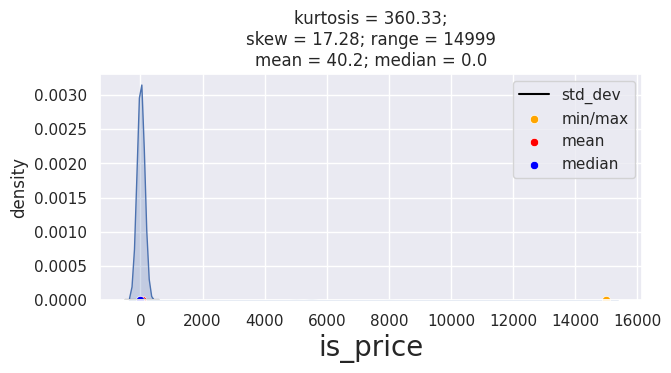

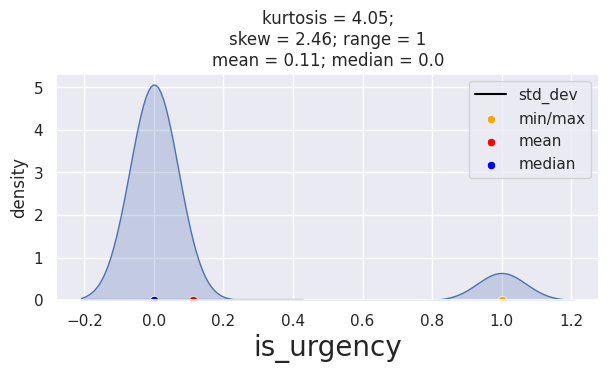

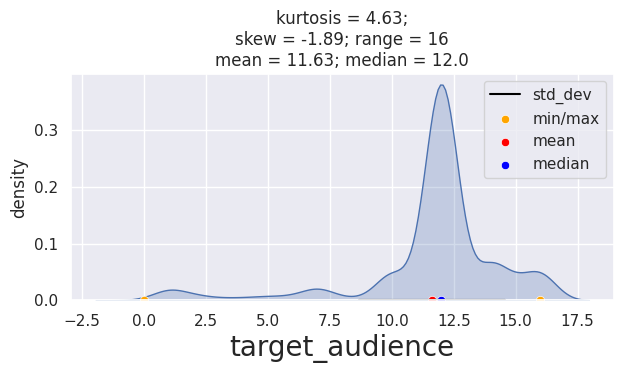

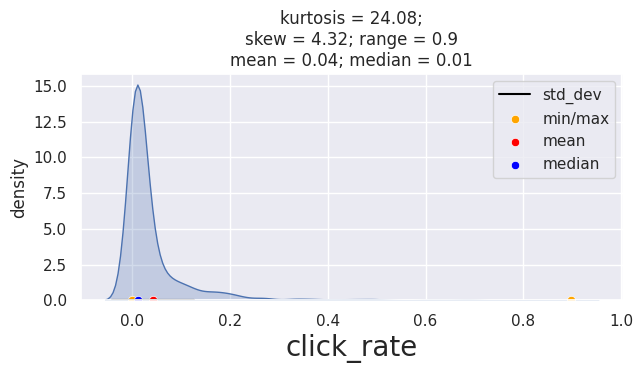

In [25]:
#Checking the distribution of all independent numerical variables.
for i in Numerical_features:
  UVA_KDE(train,[i])

We can analyze after plotting above graphs that, Only subject_len,body_len and days_of_week has normally distributed and all other variables are either right skewed or left skewed.

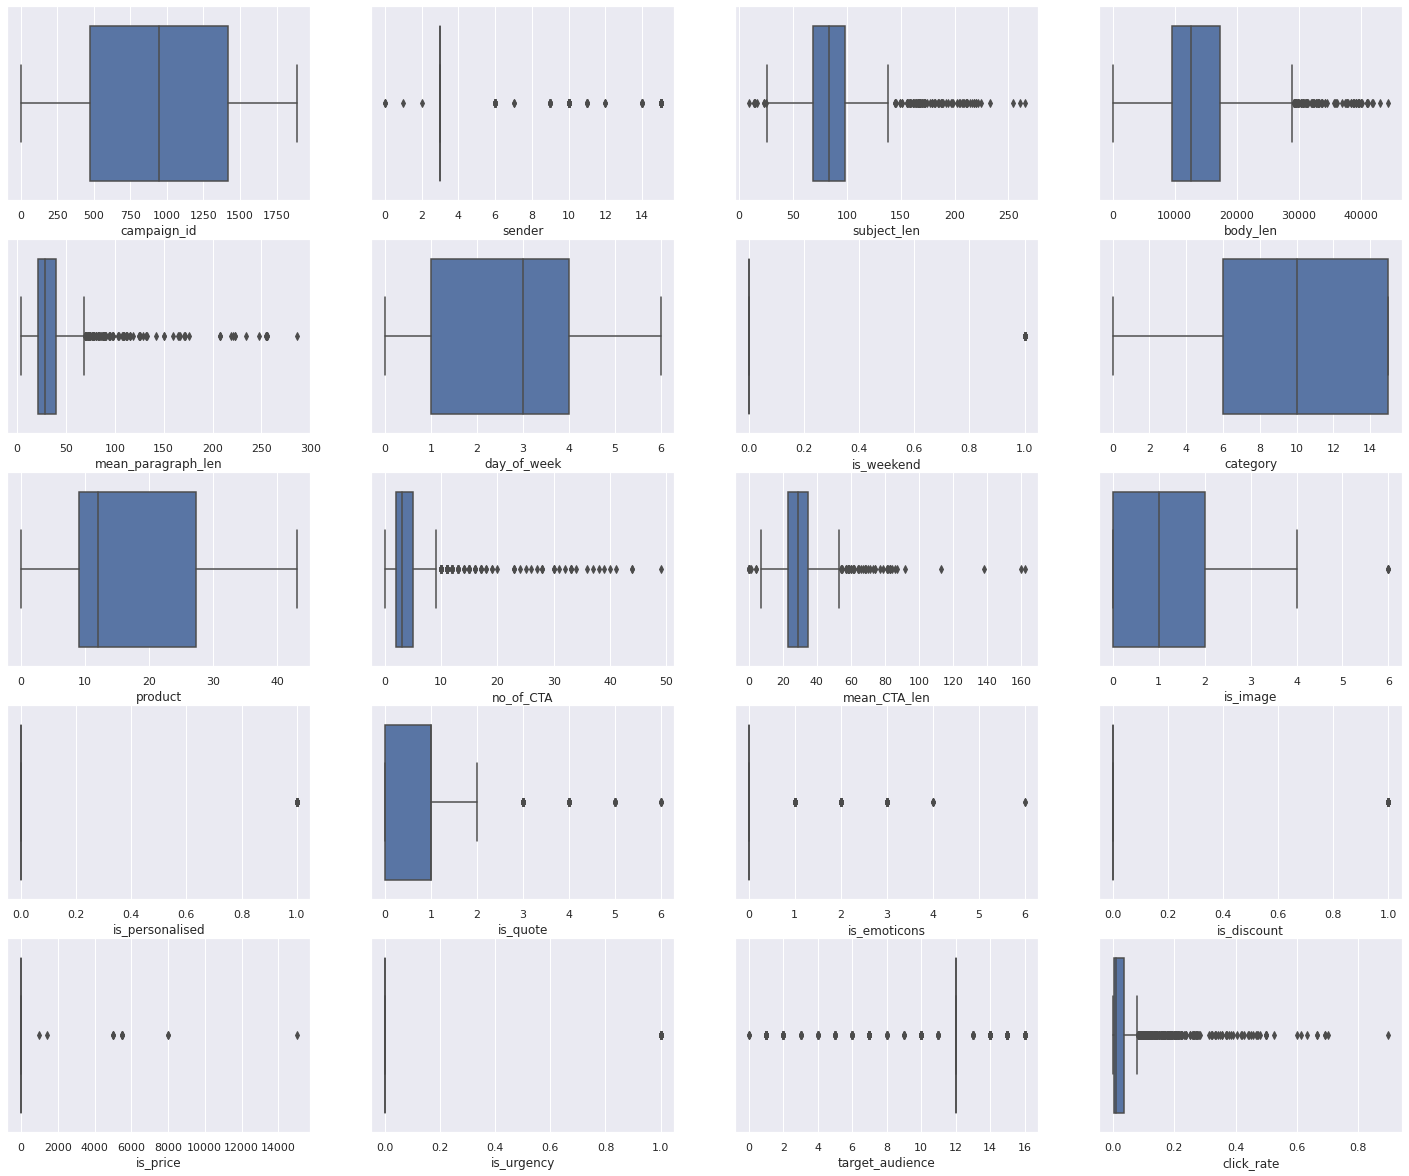

In [26]:
#Plotting the boxplot for all independent numerical variables.
n = 1
plt.figure(figsize=(25,25))
for j in Numerical_features:
  plt.subplot(6,4,n)
  n=n+1
  sns.boxplot(x=train[j])

#Bivariate Analysis:

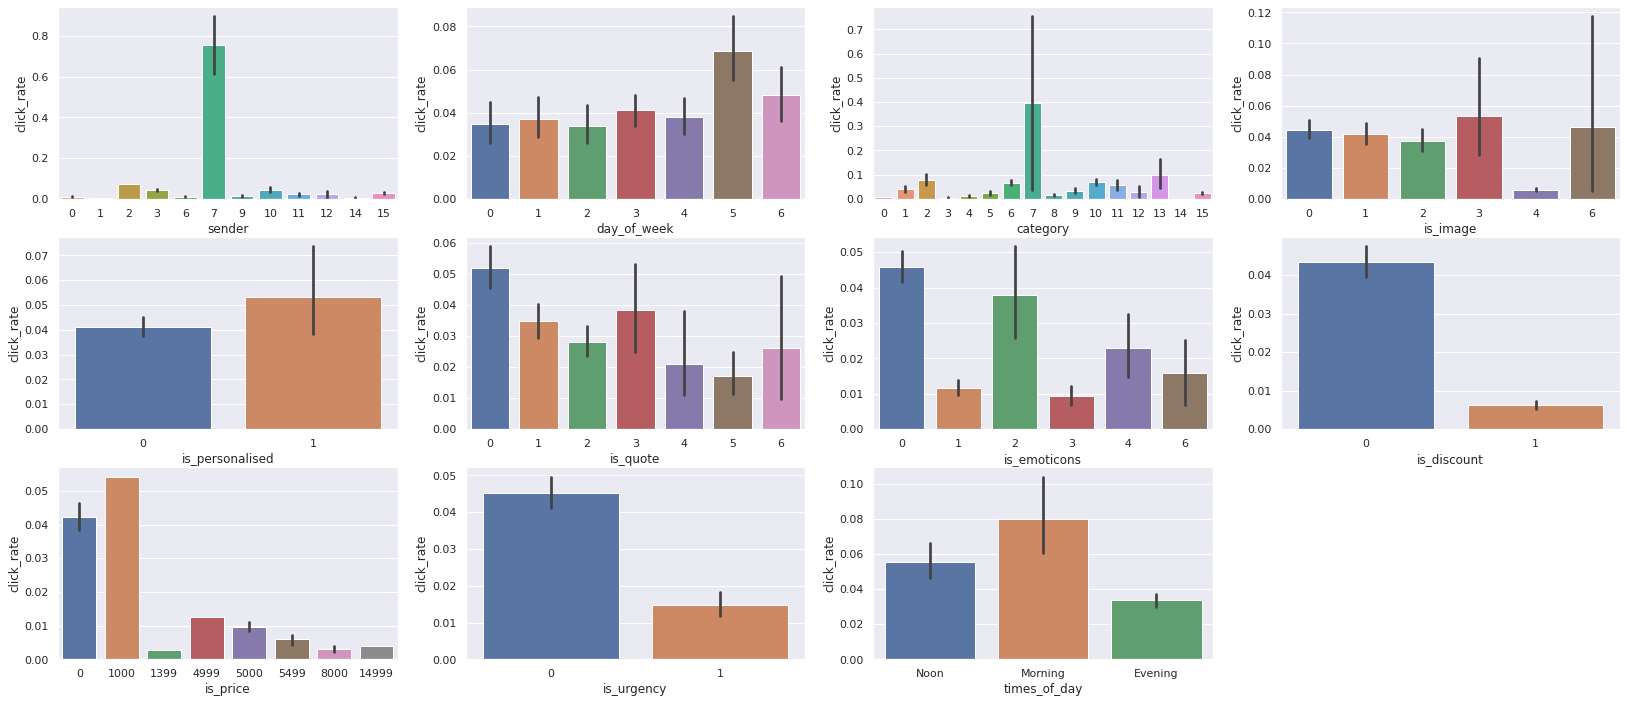

In [27]:
#Plotting bar graph for better interpretation of variables.
sns.set(rc={"figure.figsize": (28, 12)})
subplot(3,4,1)
sns.barplot(train['sender'], y=train['click_rate'])
subplot(3,4,2)
sns.barplot(train['day_of_week'], y=train['click_rate'])
subplot(3,4,3)
sns.barplot(train['category'], y=train['click_rate'])
subplot(3,4,4)
sns.barplot(train['is_image'], y=train['click_rate'])
subplot(3,4,5)
sns.barplot(train['is_personalised'], y=train['click_rate'])
subplot(3,4,6)
sns.barplot(train['is_quote'], y=train['click_rate'])
subplot(3,4,7)
sns.barplot(train['is_emoticons'], y=train['click_rate'])
subplot(3,4,8)
sns.barplot(train['is_discount'], y=train['click_rate'])
subplot(3,4,9)
sns.barplot(train['is_price'], y=train['click_rate'])
subplot(3,4,10)
sns.barplot(train['is_urgency'], y=train['click_rate'])
subplot(3,4,11)
sns.barplot(train['times_of_day'], y=train['click_rate']);

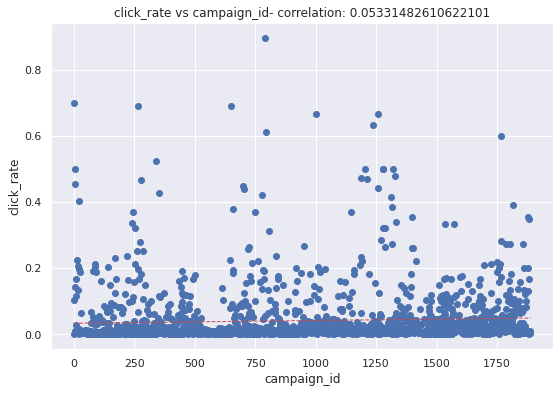

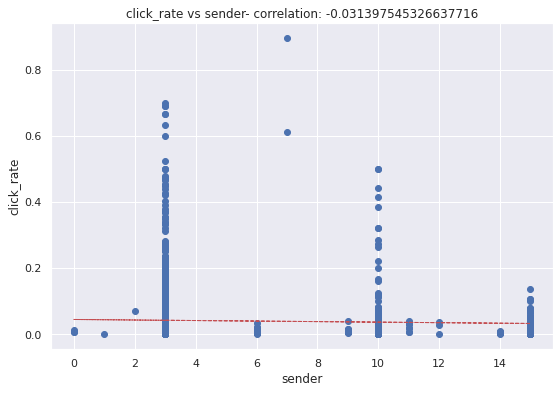

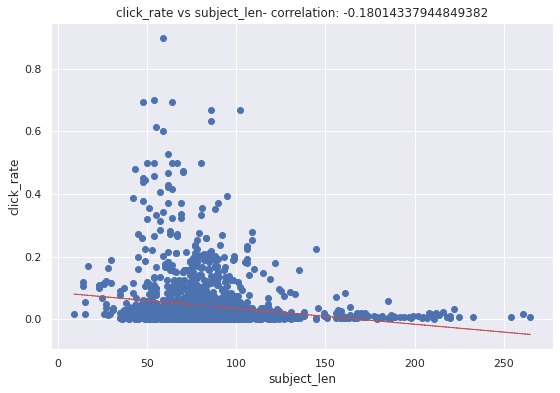

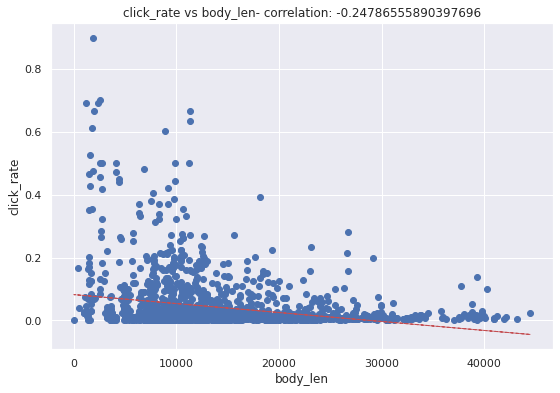

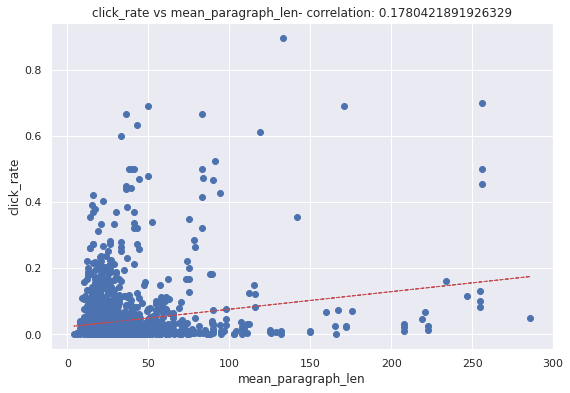

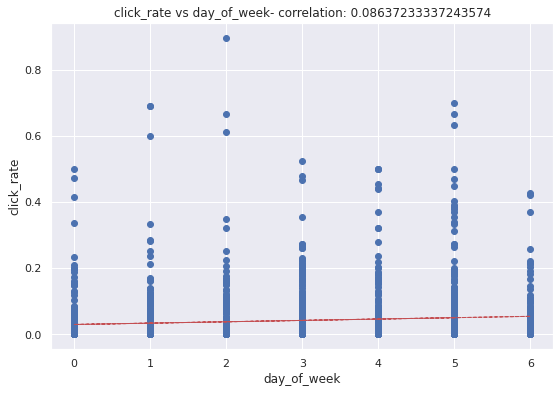

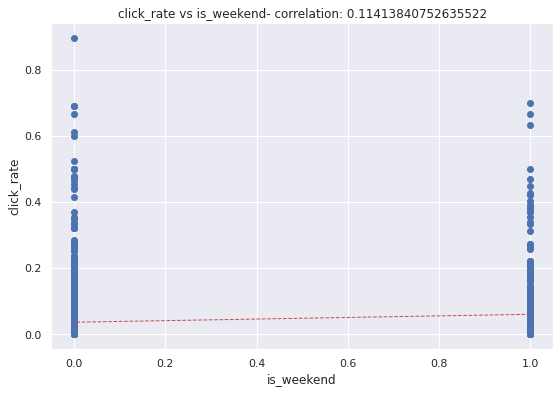

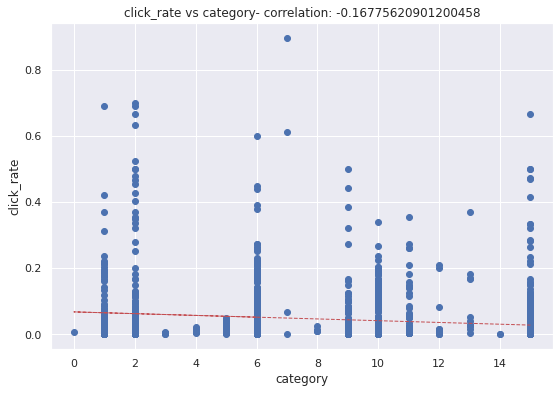

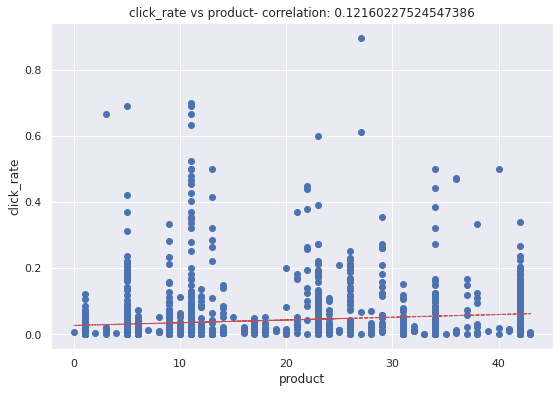

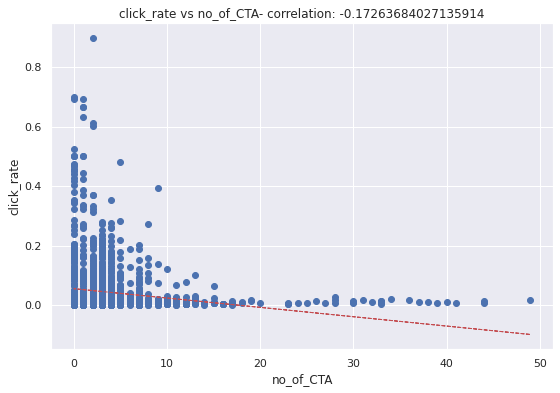

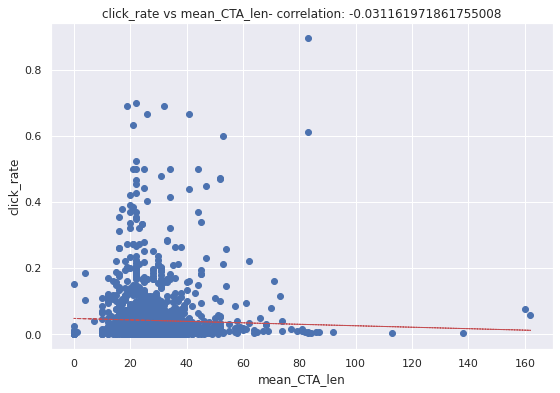

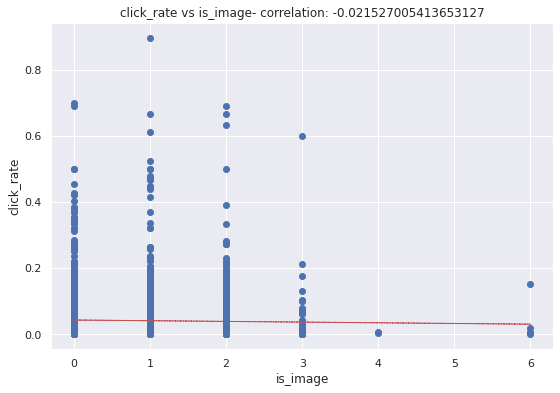

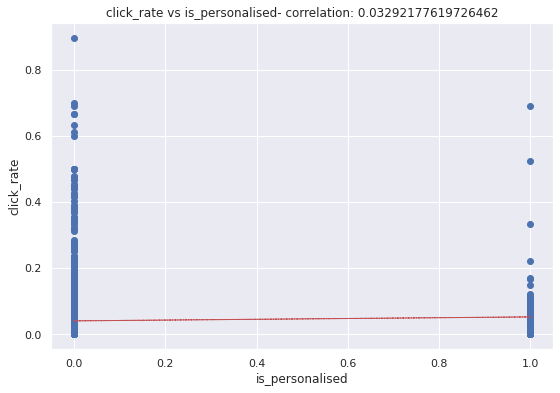

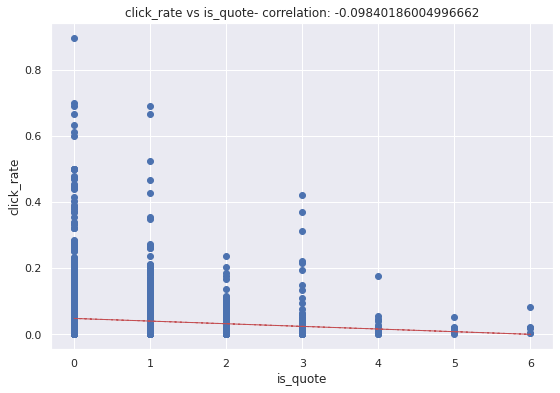

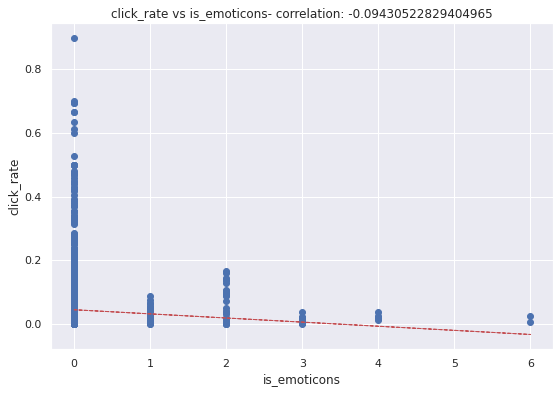

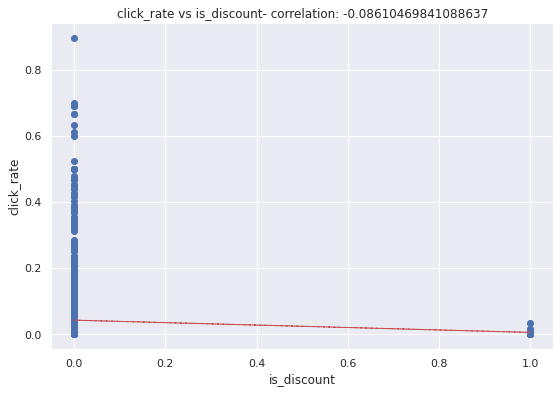

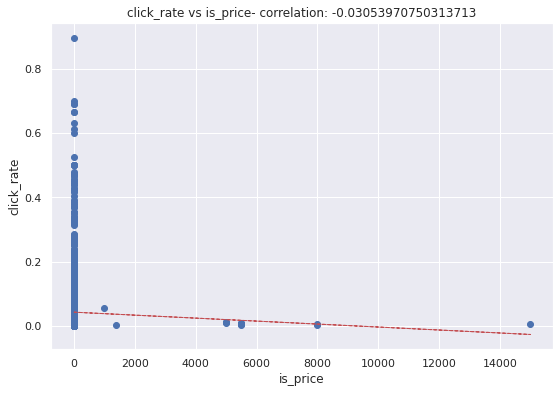

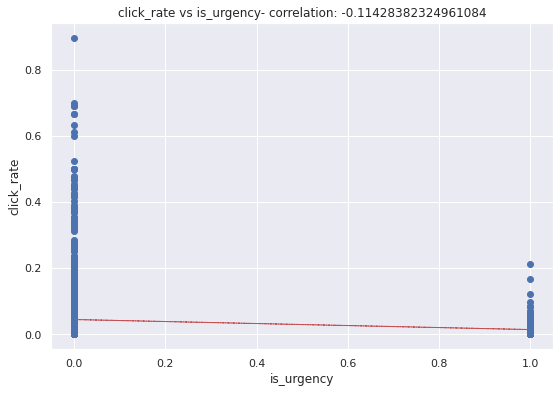

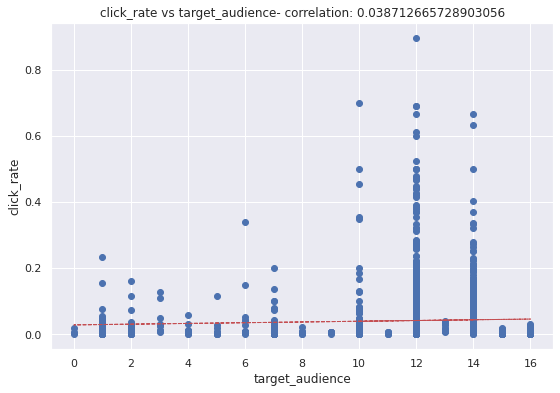

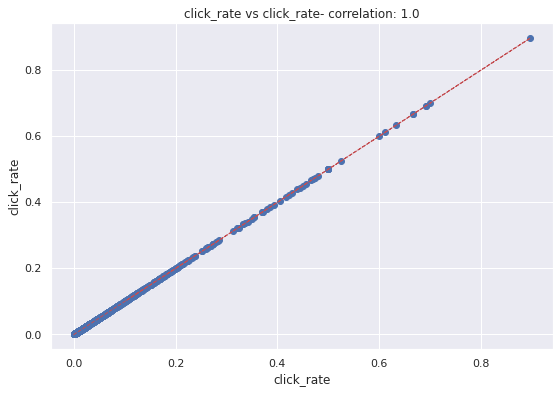

In [28]:
# plot scatter dataset correlation of rented bike data vs all numerical variables
# check Homoscedasticity
for col in Numerical_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = train[col]
    label = train['click_rate']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('click_rate')
    ax.set_title('click_rate vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(train[col], train['click_rate'], 1)
    y_hat = np.poly1d(z)(train[col])

    plt.plot(train[col], y_hat, "r--", lw=1)

plt.show()

We Observed that:
* Subject_len & body_len are negatively correlated to our dependent variable.
* Mean_paragraph_len is positively correlated to dependent variable.

#Check Multicollinearity

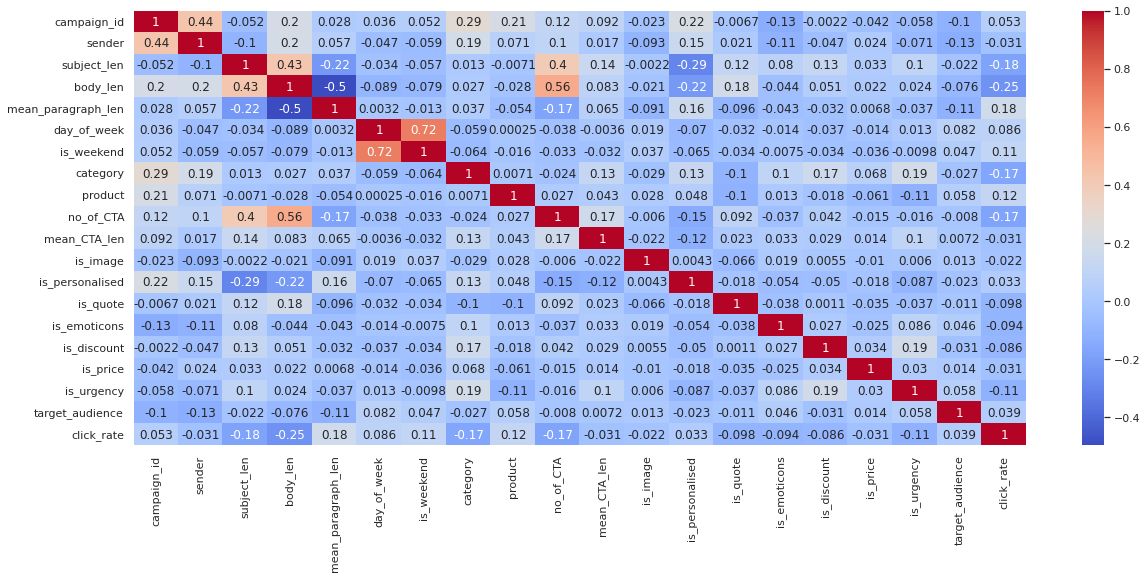

In [29]:
## Check Correlation matrix.
plt.figure(figsize=(20,8))
correlation = train.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm');

Here we can see that, 'day_of_week' is correlated with 'is_weekend' variable. Therefore, we have to drop this feature.

In [30]:
#Dropping the variable.
train = train.drop(['day_of_week'],axis=1)
test = test.drop(['day_of_week'],axis=1)

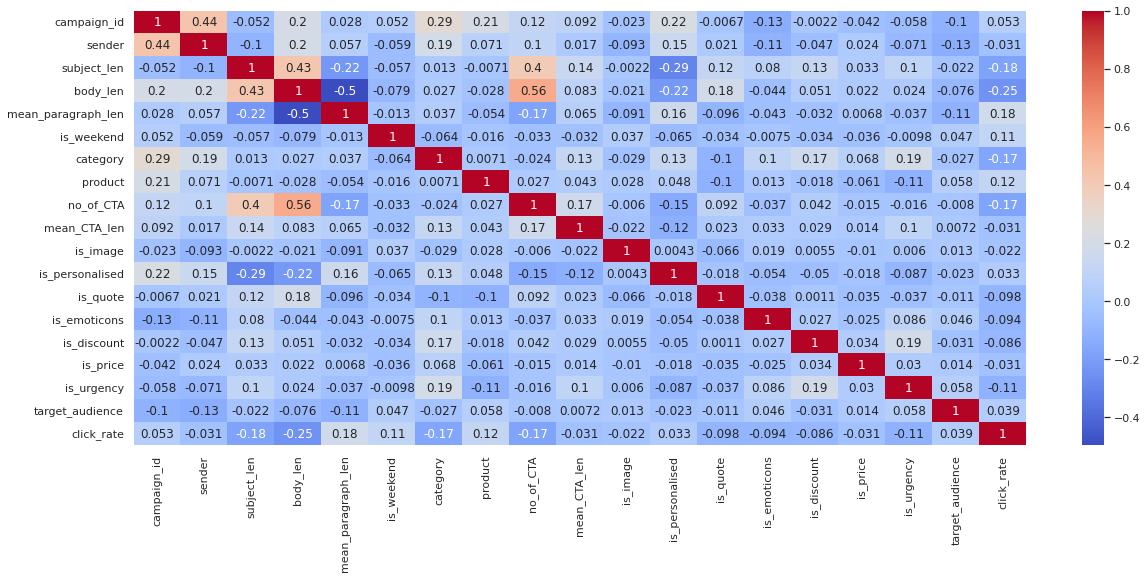

In [31]:
plt.figure(figsize=(20,8))
correlation = train.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm');

#Handling the outliers

In [32]:
#Outlier treatment of train dataset:

df1 = train.copy()

features1 = train.describe().columns.drop(['click_rate','target_audience','sender'])

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = (Q3+(1.5*IQR))
    lower_limit = (Q1-(1.5*IQR))
    df1[i] = np.where(df1[i]> upper_limit, upper_limit,
                        np.where(df1[i]< lower_limit, lower_limit,
                          df1[i]))
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had \033[1m{}\033[0m samples.'.format(train.shape[0]))
print('After removal of outliers, The dataset now has \033[1m{}\033[0m samples.'.format(df1.shape[0]))

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1.0,3,76.0,10439.0,39.0,0.0,Noon,6.0,26.0,3.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0.103079
1,2.0,3,54.0,2570.0,68.5,0.0,Morning,2.0,11.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700000
2,3.0,3,59.0,12801.0,16.0,0.0,Noon,2.0,11.0,3.0,23.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,16,0.002769
3,4.0,3,74.0,11037.0,30.0,0.0,Evening,15.0,9.0,4.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.010868
4,5.0,3,80.0,10011.0,27.0,0.0,Noon,6.0,26.0,3.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14,0.142826



Inference:
Before removal of outliers, The dataset had 1888 samples.
After removal of outliers, The dataset now has 1888 samples.


In [33]:
#Outlier treatment of test dataset:

df2 = test.copy()

features1 = test.describe().columns.drop(['target_audience','sender'])

for i in features1:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = (Q3+(1.5*IQR))
    lower_limit = (Q1-(1.5*IQR))
    df2[i] = np.where(df2[i]> upper_limit, upper_limit,
                        np.where(df2[i]< lower_limit, lower_limit,
                          df2[i]))
    df2 = df2.reset_index(drop=True)
display(df2.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had \033[1m{}\033[0m samples.'.format(test.shape[0]))
print('After removal of outliers, The dataset now has \033[1m{}\033[0m samples.'.format(df2.shape[0]))

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889.0,3,61.0,12871.0,11.0,0.0,Noon,6.0,26.0,3.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14
1,1890.0,3,54.0,2569.0,67.5,0.0,Morning,2.0,11.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,1891.0,3,88.0,1473.0,67.5,0.0,Evening,2.0,11.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10
3,1892.0,3,88.0,1473.0,67.5,0.0,Evening,2.0,11.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10
4,1893.0,3,78.0,9020.0,29.0,0.0,Noon,6.0,26.0,2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14



Inference:
Before removal of outliers, The dataset had 762 samples.
After removal of outliers, The dataset now has 762 samples.


In [34]:
train = df1.copy()
test = df2.copy()

#Feature Engineering

In [35]:
#Converting categorical into new numerical features.
Times_of_day = pd.get_dummies(train['times_of_day'], drop_first= True)
train = pd.concat([train,Times_of_day], axis = 'columns')
Times_of_day = pd.get_dummies(test['times_of_day'],drop_first= True)
test = pd.concat([test,Times_of_day], axis = 'columns')

In [36]:
#Dropping unnecessary variables that may affect our model.
train = train.drop(['times_of_day','is_emoticons','is_discount','is_price','is_urgency'],axis = 1)
test = test.drop(['times_of_day','is_emoticons','is_discount','is_price','is_urgency'],axis = 1)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   float64
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   float64
 3   body_len            1888 non-null   float64
 4   mean_paragraph_len  1888 non-null   float64
 5   is_weekend          1888 non-null   float64
 6   category            1888 non-null   float64
 7   product             1888 non-null   float64
 8   no_of_CTA           1888 non-null   float64
 9   mean_CTA_len        1888 non-null   float64
 10  is_image            1888 non-null   float64
 11  is_personalised     1888 non-null   float64
 12  is_quote            1888 non-null   float64
 13  target_audience     1888 non-null   int64  
 14  click_rate          1888 non-null   float64
 15  Morning             1888 non-null   uint8  
 16  Noon  

#Modelling

In [38]:
#Distributing data in X,Y .
X = train.drop(['campaign_id','click_rate'],axis=1)
y = np.sqrt(train['click_rate'])

In [39]:
#Distributing data in X,Y .
X = train.drop(['campaign_id','click_rate'],axis=1)
y = train['click_rate']

In [40]:
#Splitting the train-test data.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state= 111) 
print(X_train.shape)
print(X_test.shape)

(1510, 15)
(378, 15)


In [43]:
#Implementing Cat Boost model.
model1 = CatBoostRegressor()
model1.fit(X_train,y_train)
train_pred = model1.predict(X_train)
train_score_r2 = r2_score((train_pred), (y_train))

test_pred = model1.predict(X_test)
test_score_r2 = r2_score((test_pred), (y_test))


Learning rate set to 0.043698
0:	learn: 0.0851510	total: 1.19ms	remaining: 1.19s
1:	learn: 0.0842942	total: 2.29ms	remaining: 1.14s
2:	learn: 0.0835113	total: 3.32ms	remaining: 1.1s
3:	learn: 0.0826570	total: 4.47ms	remaining: 1.11s
4:	learn: 0.0816477	total: 5.51ms	remaining: 1.09s
5:	learn: 0.0809375	total: 6.53ms	remaining: 1.08s
6:	learn: 0.0802178	total: 7.56ms	remaining: 1.07s
7:	learn: 0.0795902	total: 8.7ms	remaining: 1.08s
8:	learn: 0.0787573	total: 10.7ms	remaining: 1.18s
9:	learn: 0.0780971	total: 12.6ms	remaining: 1.24s
10:	learn: 0.0772052	total: 14.5ms	remaining: 1.3s
11:	learn: 0.0765739	total: 19.4ms	remaining: 1.6s
12:	learn: 0.0760032	total: 20.7ms	remaining: 1.57s
13:	learn: 0.0752240	total: 22.1ms	remaining: 1.56s
14:	learn: 0.0746748	total: 23.4ms	remaining: 1.54s
15:	learn: 0.0741518	total: 24.8ms	remaining: 1.52s
16:	learn: 0.0737810	total: 26.1ms	remaining: 1.51s
17:	learn: 0.0731580	total: 27.5ms	remaining: 1.5s
18:	learn: 0.0726092	total: 28.8ms	remaining: 1.4

In [44]:
print(train_score_r2)
print(test_score_r2)

0.9444364965318446
0.41560420611398285


In [45]:
#Comparing the plain vanilla models.
algos = [LinearRegression(),
          RandomForestRegressor(), XGBRegressor(), CatBoostRegressor() ]

names = ['Linear Regression',
          'Random Forest Regressor', 'XG Boost Regression', 'Cat Boost Regression']

rmse_list = []
mape_list = []
R2 = []
Train = []

In [46]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE= metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    r2_final = r2_score((y_test), (y_pred))
    R2.append(r2_final)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    mape_list.append(MAPE)
    train = model.score(X_train,y_train)
    Train.append(train)

[07:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.043698
0:	learn: 0.0851510	total: 3.09ms	remaining: 3.08s
1:	learn: 0.0842942	total: 6.01ms	remaining: 3s
2:	learn: 0.0835113	total: 7.39ms	remaining: 2.46s
3:	learn: 0.0826570	total: 8.87ms	remaining: 2.21s
4:	learn: 0.0816477	total: 10.3ms	remaining: 2.05s
5:	learn: 0.0809375	total: 11.6ms	remaining: 1.93s
6:	learn: 0.0802178	total: 13ms	remaining: 1.84s
7:	learn: 0.0795902	total: 14.3ms	remaining: 1.77s
8:	learn: 0.0787573	total: 15.6ms	remaining: 1.71s
9:	learn: 0.0780971	total: 17ms	remaining: 1.68s
10:	learn: 0.0772052	total: 18.3ms	remaining: 1.64s
11:	learn: 0.0765739	total: 19.8ms	remaining: 1.63s
12:	learn: 0.0760032	total: 21.1ms	remaining: 1.6s
13:	learn: 0.0752240	total: 22.4ms	remaining: 1.58s
14:	learn: 0.0746748	total: 23.9ms	remaining: 1.57s
15:	learn: 0.0741518	total: 25.2ms	remaining: 1.55s
16:	learn: 0.0737810	total: 2

In [47]:
#Creating dataframe for plain vanilla models.
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list,
                           'Train' : Train,
                           'R2_Score': R2,
                           'MAPE' : mape_list})
print('\033[1m\033[4mThis dataframe shows baseline models evaluation scores\033[0m:','\n')
evaluation

This dataframe shows baseline models evaluation scores: 



,Model,RMSE,Train,R2_Score,MAPE
0,Linear Regression,0.069639,0.155451,0.166192,5.838000e+12
1,Random Forest Regressor,0.049667,0.931228,0.575877,4.221554e+12
2,XG Boost Regression,0.054977,0.710829,0.480346,3.703729e+12
3,Cat Boost Regression,0.049600,0.953682,0.577013,3.348019e+12


In [48]:
test = test.drop('campaign_id',axis=1)

In [49]:
#Saving the sample submission
submission = pd.read_csv('/content/sample_submission_LJ2N3ZQ.csv')
final_pred = model1.predict(test)
submission['click_rate'] = final_pred
submission.to_csv('finalsubmission2.csv', index=False)

#Conclusion:
* We can see that Random Forest Regressor and Cat Boost Regressor performed best among all models.